In [3]:
import pandas as pd
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt



In [4]:
user_data=pd.read_csv('/Users/apple/Desktop/DataMining/project/users_from_arizona.csv')


In [5]:
user_data.head(10)

,Unnamed: 0,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,...,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since
0,0,-3i9bhfvrM3F1wsC9XIB8g,4.07,813,92,813,590,15,38,128,...,235,3052,"2010, 2016, 2008, 2015, 2007, 2011, 2014, 2013...",94,"CLKGEdkqwQT6oVJG_deC7g, sfow6eRRLPTQa4MEHmKbaQ...",2762,Linda,635,3215,2005-08-07
1,1,-55DgUo52I3zW9RxkZ-EAQ,4.56,0,0,0,0,0,0,0,...,0,9,None,0,"vFhxmJcNdrnGNfN5w5LcVA, ffnUCiqR_yCC7uilc1b62Q...",1,John,45,19,2013-04-11
2,2,-7fIoUgPboApCfkG0U7W4g,3.25,0,0,0,0,0,0,0,...,0,0,None,0,"a0vrgccRm7_z3uORfuhCgw, Qv-DsqeJqgg-qvN08cwzkQ...",0,Ashley,4,0,2015-08-10
3,3,-9da1xk7zgnnfO1uTVYGkA,4.10,5456,43,5456,3075,5,79,844,...,890,15512,"2012, 2017, 2018, 2013, 2014, 2016, 2015",174,"_owMBYfzT9dO7FXGXXzXqA, dYEHTYJeDJ4v8AUiExaVsw...",13579,Fran,1021,16172,2012-04-05
4,4,-D8Zi00T-ivGzQNc-ZAN3Q,1.80,0,0,0,0,0,0,1,...,0,0,None,0,"PB97isgyCVqTx0Z6EtJ-Ig, z2HZod8BhRJ11W7_neSEwg...",0,Brittany,4,2,2012-04-17
5,5,-Ef8EdRF7yDxrCXIE2mE0A,3.00,0,0,0,0,0,0,0,...,0,0,None,0,"OL2XOeg3CEoPtfpONVJ2Zg, zDUsbgkhH7DPCuBvXkCJdw...",0,Margaret,2,0,2014-12-24
6,6,-GKEFg_92pp0q842clS_Jw,3.90,8,0,8,4,0,3,5,...,7,7,"2012, 2013, 2014, 2015",18,"2qW-VO3UxZSU6HSHQ7fh7Q, RBZ_kMjowV0t6_nv2UKaDQ...",30,Jeff,313,40,2011-07-18
7,7,-JJo0A9pk6-l6nryr-IKVg,2.00,0,0,0,0,0,0,1,...,0,1,None,0,"JxG1ReJSc8o_tUGoVsQV4w, 01xaFS_KPpYP46GW6dzlAg...",7,Linda,2,36,2016-01-25
8,8,-KPZpkZEuKaMYQXHWSTw2g,4.43,1,0,1,0,0,1,0,...,0,0,None,0,"019qV3UwSBa4Q5R_1LkMkQ, 1W1in7aa6chaQAP9gjWHVQ...",0,Chad,7,0,2011-02-21
9,9,-d5jZCMlYOEa-jQDUqghOA,5.00,0,0,0,0,0,0,0,...,0,4,None,0,"Em6IpTLzeU8V5D78dINZog, wONYuL_vLRWSXGjqRuTevw...",0,Tami,2,0,2013-02-23


In [6]:
user_df=user_data.filter(['user_id', 'friends'], axis=1)

In [7]:
user_df.head(10)

,user_id,friends
0,-3i9bhfvrM3F1wsC9XIB8g,"CLKGEdkqwQT6oVJG_deC7g, sfow6eRRLPTQa4MEHmKbaQ..."
1,-55DgUo52I3zW9RxkZ-EAQ,"vFhxmJcNdrnGNfN5w5LcVA, ffnUCiqR_yCC7uilc1b62Q..."
2,-7fIoUgPboApCfkG0U7W4g,"a0vrgccRm7_z3uORfuhCgw, Qv-DsqeJqgg-qvN08cwzkQ..."
3,-9da1xk7zgnnfO1uTVYGkA,"_owMBYfzT9dO7FXGXXzXqA, dYEHTYJeDJ4v8AUiExaVsw..."
4,-D8Zi00T-ivGzQNc-ZAN3Q,"PB97isgyCVqTx0Z6EtJ-Ig, z2HZod8BhRJ11W7_neSEwg..."
5,-Ef8EdRF7yDxrCXIE2mE0A,"OL2XOeg3CEoPtfpONVJ2Zg, zDUsbgkhH7DPCuBvXkCJdw..."
6,-GKEFg_92pp0q842clS_Jw,"2qW-VO3UxZSU6HSHQ7fh7Q, RBZ_kMjowV0t6_nv2UKaDQ..."
7,-JJo0A9pk6-l6nryr-IKVg,"JxG1ReJSc8o_tUGoVsQV4w, 01xaFS_KPpYP46GW6dzlAg..."
8,-KPZpkZEuKaMYQXHWSTw2g,"019qV3UwSBa4Q5R_1LkMkQ, 1W1in7aa6chaQAP9gjWHVQ..."
9,-d5jZCMlYOEa-jQDUqghOA,"Em6IpTLzeU8V5D78dINZog, wONYuL_vLRWSXGjqRuTevw..."


In [10]:
user_data_split=pd.concat([Series(row['user_id'], row['friends'].split(','))
           for _, row in user_df.iterrows()]).reset_index()

In [9]:
from pandas import Series

In [11]:
user_data_split.head(20)
#column1-friends , column2-user 
#1:1 dataframe

,index,0
0,CLKGEdkqwQT6oVJG_deC7g,-3i9bhfvrM3F1wsC9XIB8g
1,sfow6eRRLPTQa4MEHmKbaQ,-3i9bhfvrM3F1wsC9XIB8g
2,m6OZG66JPXVIZRkqm6reDg,-3i9bhfvrM3F1wsC9XIB8g
3,8mrc4DVb1EMGmJen_qWqVg,-3i9bhfvrM3F1wsC9XIB8g
4,dtsE27TVc0CklFMHRw5WFA,-3i9bhfvrM3F1wsC9XIB8g
5,wYgJJpTFC9wVBZc6rgLiHA,-3i9bhfvrM3F1wsC9XIB8g
6,Fd6yfocEW6sHqfDthh-a3A,-3i9bhfvrM3F1wsC9XIB8g
7,sMgs1e2yxylzaTmb4t1nMg,-3i9bhfvrM3F1wsC9XIB8g
8,n6l2ZservpTfGzaQfUMNZQ,-3i9bhfvrM3F1wsC9XIB8g
9,ggm-3JvV9yj4Z78bgpfb2g,-3i9bhfvrM3F1wsC9XIB8g


In [33]:
 #to remove redundant connections as it is suppposed to be a undirected graph.
    user_data_split['check_string'] = user_data_split.apply(lambda row: ''.join(sorted([   str(row['index']) , str(row['0'])    ])), axis=1)

KeyError: ('0', 'occurred at index 0')

In [34]:
G=nx.from_pandas_dataframe(user_data_split, 0, index)

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

In [ ]:
G = nx.from_pandas_edgelist(user_data_split, source=0, target='index')

In [ ]:
print(user_data_split.count())

In [ ]:
#based on the count, take a small subset, build graph and check GN ALgo


In [12]:
user_data_split.count()

index    14831855
0        14831855
dtype: int64

In [57]:
subset=user_data_split[:1000]

In [39]:
sub=user_data_split[600:1000]


In [1]:
print("hey")

hey


In [23]:
sub.head(20)

,index,0
0,CLKGEdkqwQT6oVJG_deC7g,-3i9bhfvrM3F1wsC9XIB8g
1,sfow6eRRLPTQa4MEHmKbaQ,-3i9bhfvrM3F1wsC9XIB8g
2,m6OZG66JPXVIZRkqm6reDg,-3i9bhfvrM3F1wsC9XIB8g
3,8mrc4DVb1EMGmJen_qWqVg,-3i9bhfvrM3F1wsC9XIB8g
4,dtsE27TVc0CklFMHRw5WFA,-3i9bhfvrM3F1wsC9XIB8g
5,wYgJJpTFC9wVBZc6rgLiHA,-3i9bhfvrM3F1wsC9XIB8g
6,Fd6yfocEW6sHqfDthh-a3A,-3i9bhfvrM3F1wsC9XIB8g
7,sMgs1e2yxylzaTmb4t1nMg,-3i9bhfvrM3F1wsC9XIB8g
8,n6l2ZservpTfGzaQfUMNZQ,-3i9bhfvrM3F1wsC9XIB8g
9,ggm-3JvV9yj4Z78bgpfb2g,-3i9bhfvrM3F1wsC9XIB8g


In [61]:
G = nx.from_pandas_edgelist(subset, source=0, target='index')

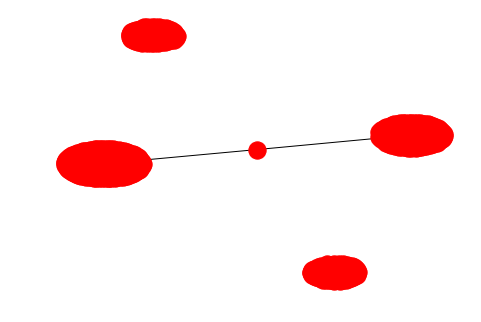

In [62]:
nx.draw(G)

In [63]:
comp = nx.algorithms.community.centrality.girvan_newman(G)

In [64]:
comp


<generator object girvan_newman at 0xa2e7f5750>

In [65]:
for c in next(comp):
    print(c)

{' ujn1jZzzYPa3IuHp165roA', ' VpdTuUd1PoWFCLRkZd1E2Q', ' yBZKyXBlcCeSdAcJMOm9og', ' 8hepj9Z88QSRi-0m7uZzuA', ' sq4CRvKQXrsS8oqw7SXYAg', ' 4JY_lk685XG8twC02tXevw', ' 1bkWllakFKLwFaRGopEd7g', ' KUrCncbXE7Y8veFyk4RkOQ', ' TaSuA4rH7DZguBszlFYJ4w', ' FC5QQfkfMRZ6pLULQdPNcA', ' c8553pGUN0UEdOqtu5FsTg', ' UPHanOqH_I4xo6OXPy0HpA', ' rlOUbQzvpMShr0y4OfsQFA', ' 58nZ8eD-y8Z-5JiV5ELKcQ', ' cdBP3CZJGFt7KxGtC9djgA', ' Aqdl28uo0qXG6NkpOy3EVQ', ' iQHAgcX_whpJFDTF52BtuQ', ' fcy5WjmZuxO_xGUbt2lExw', ' urKmVRS2LtuZlrQwSV6JpA', ' azE1XMwcy6AUi8Nr2HA3sw', ' xU_ZliVBalla9ELsERINuA', ' SR6U4O9T1veUPukbR99t1w', ' PwfT4dszJChtjaPD7u-_zw', ' qcTTfZizkSdzXtDkEZaiTQ', ' kaBRqQLNmWIKzJ4MGjthLA', ' 5pg1SgG5AHjiideluTyONQ', ' slJeoUVDtvfxV8_1IVvHmQ', ' iAMjupMDnLmtFtcJrUrXKQ', ' g99RpzE6pchIKzwJ_kBjww', 'a0vrgccRm7_z3uORfuhCgw', ' W4AN3nCb9PU6BtVKvrOQ9Q', ' wFUrqFVCeyPhuGE7VH8BZw', ' _I7jKwz0zEYLSQtmvQkNnQ', ' 62VOtzAAvF3_-dhzpW_OZQ', ' 3UfbEE7L-TM6mLhPTQOaYg', ' mbAZ57Am9kTKDHfuMzMdug', ' ZIMy5dZ9pfM9rte-q71E3g', '

In [60]:
subset[0].unique()


array(['-7fIoUgPboApCfkG0U7W4g', '-3i9bhfvrM3F1wsC9XIB8g',
       '-55DgUo52I3zW9RxkZ-EAQ', '-9da1xk7zgnnfO1uTVYGkA'], dtype=object)

In [58]:
subset = subset.sample(frac=1).reset_index(drop=True)
#random shuffling

In [59]:
subset.head(20)

,index,0
0,KDn_ALXdl_IEYst8_DlLLQ,-7fIoUgPboApCfkG0U7W4g
1,ad8cXN5pYhs8EtSUat5WpA,-3i9bhfvrM3F1wsC9XIB8g
2,cPHq3H0RzLP7xcT4bd_XVg,-55DgUo52I3zW9RxkZ-EAQ
3,vhDuFs7uHR7q6PiGCuu3pA,-9da1xk7zgnnfO1uTVYGkA
4,tDnoTB0sQQ72sBHdMJ-05A,-3i9bhfvrM3F1wsC9XIB8g
5,QA4v0Is4Gs5KB-F3iSeHaA,-3i9bhfvrM3F1wsC9XIB8g
6,FQP16KOZRgGaNE_hS-rbug,-3i9bhfvrM3F1wsC9XIB8g
7,S6tIGhQX79qiZbz6R8ghNA,-7fIoUgPboApCfkG0U7W4g
8,8CSd-C5PgFTVv2SZtrujPw,-9da1xk7zgnnfO1uTVYGkA
9,HpuhfXJu094bKAmzAQJrIg,-9da1xk7zgnnfO1uTVYGkA


In [76]:

sub_user_df=user_data[:1000]

In [77]:
sub_user_df = sub_user_df.sample(frac=1).reset_index(drop=True)

In [78]:
from pandas import Series

In [83]:
temp=pd.concat([Series(row['user_id'],str(row['fans']),str(row['review_count'] ),str(row['average_stars']),str(row['useful']) ,row['friends'].split(',') )
           for _, row in sub_user_df.iterrows()])

AttributeError: 'str' object has no attribute 'dtype'

In [79]:
sub_user_df.head(10)

,Unnamed: 0,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,...,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since
0,894,gZeB24yyyq8q9_ncZ9XymA,3.63,0,0,0,0,0,0,2,...,0,2,None,3,"M8fGyBwzv27sg3LV08CSiw, Mjk2mbyuVWGTgCK5Sprluw...",8,Angelique,53,14,2011-03-22
1,103,4IIK9gPE6JUFhJ931QQjCQ,5.00,0,0,0,0,0,0,0,...,0,0,None,0,"eAT5vE2eddk3zh6t65AZuw, BkKI9tF5xWI6exSDxSgRkA...",0,Matt,1,0,2016-05-16
2,57,2H_rKyCaPh8MZEmzrwPtAA,5.00,0,0,0,0,0,0,0,...,0,0,None,0,"FLx1GUKq8S18l8oXzNDjbg, zDoRoctLB2hb5pirvs6XZw...",0,Miriam,4,0,2015-12-31
3,465,Lz3ZQQiIsgiIkP9iqHcNdQ,3.86,0,0,0,0,0,0,0,...,0,0,None,0,"JkNvc-ik6Gqr_78BopVxfw, JgUpg63kx2hHvSJ7E5VwXA...",0,Kim,14,0,2009-01-25
4,629,T_etKtH1yVi-jjPCspYeAg,5.00,0,0,0,0,0,0,0,...,0,0,None,0,RnC18UV30XBEtmTlY4S1KA,0,Tater,3,0,2013-06-30
5,280,DKTjP1CNpR1AHTwprLpc5w,3.96,0,0,0,0,0,0,1,...,0,0,None,0,"dyhZLZXiHTqTAkKko72l6A, g3L1W_rHBWvVYu0s63m0CA",0,Brian,24,0,2013-09-06
6,183,8tGAZyMx0XOqZbdVxcANmA,4.17,0,0,0,0,0,0,0,...,0,0,None,0,"sGQn8c9JwtKjc0xJ_piEzA, 9b26w-a65zBD16NnszZkmw...",0,Kevin,12,1,2012-04-14
7,250,BykD76Ndd2QokKzYhNR6QA,3.60,0,0,0,0,0,0,0,...,0,0,None,0,"2qES44EhZq0XQaUTBRv8nQ, _gghVdV01JSKm0furxbg4g...",0,Marianne,8,0,2016-09-17
8,648,Ub5-bY15xdqd0t5UqjN7mg,4.00,0,0,0,0,0,0,0,...,0,0,None,0,"TX6RpteSMUZnGFInu7qpWw, _EjA6IuZk47Ax9iapWjE3A...",0,Ken,4,0,2013-10-31
9,725,ZAAxb_lpDo4gwcfOd_UB2Q,2.80,0,0,0,0,0,0,0,...,0,0,None,0,"NkZ2i311qCz1kn6K7Wk8KQ, iK4V223QaB1TzCfiPqQfaQ...",0,Landa,5,2,2016-07-19


In [3]:
import networkx as nx
from networkx import edge_betweenness_centrality as betweenness

In [4]:
G = nx.path_graph(10)

In [6]:
import pandas as pd
import numpy as np
r = np.random.RandomState(seed=5)
ints = r.randint(1, 10, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df[0] = a
df['b'] = b

In [32]:
 df

,weight,0,b
0,7,A,B
1,4,A,C
2,3,B,C
3,15,B,D
4,2,C,D
5,10,D,E
6,1,D,F
7,3,E,F


In [16]:


df = df.drop(0, axis=0)

In [21]:
df=df.append({'weight':7 ,0:'A' ,'b':'B' },ignore_index=True )

In [31]:
df=df.append({'weight':3 ,0:'E' ,'b':'F' },ignore_index=True )

In [35]:
G = nx.from_pandas_edgelist(df, 0, 'b', ['weight'])

In [36]:
nx.draw(G)

In [37]:
G

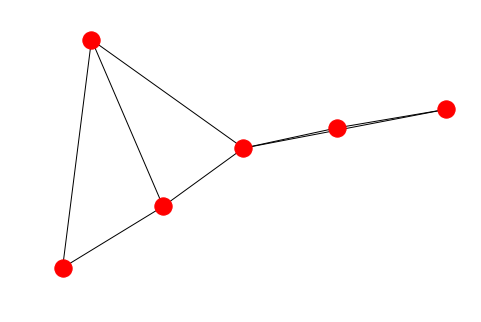

In [39]:


import matplotlib.pyplot as plt
nx.draw(G)
plt.show()


In [40]:
comp = nx.algorithms.community.centrality.girvan_newman(G)

In [41]:
for c in next(comp):
    print(c)

set(['A', 'C', 'B'])
set(['E', 'D', 'F'])


In [42]:
import time
s=time.time()
a=0
for i in xrange(49589):
    for j in range(i+1,49589):
        a=a+1
print(time.time()-s)        
    

327.40991497


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
#data = pd.read_csv("/Users/apple/Desktop/DataMining/project/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////",names = ["user1", "user2", "pearson_similarity"]) 
data = pd.read_csv("/Users/apple/Desktop/DataMining/project/user_user_pearson_30kusersonly.csv",names = ["user1", "user2", "pearson_similarity"]) 


#data = pd.read_csv("user_user_sim.csv",names = ["user1", "user2", "pearson_similarity"]) 

#pearson value ranges from -1 to +1 , so take user-user sim >0.5
data = data[data.pearson_similarity > 0]


G = nx.from_pandas_edgelist(data, "user1", "user2", ["pearson_similarity"])
nx.draw(G)
plt.show()
#apply GN algorithm
comp = nx.algorithms.community.centrality.girvan_newman(G)
#to view the community
for c in next(comp):
    print(c)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import edge_betweenness_centrality as betweenness

In [46]:
data = pd.read_csv("/Users/apple/Desktop/DataMining/project/user_user_pearson_30kusersonly.csv", sep='\s+' , names = ["user1", "user2", "pearson_similarity"]) 



In [47]:
data.head(10)


,user1,user2,pearson_similarity
0,user1,user2,0.000000e+00
1,_-COrcfb061akiNl9uCxzA,ijIgdh2bRkBNJa_puVpBoQ,-7.071068e-01
2,VKEy2rsHMS9w0dx7zgp1sg,fPRMjWUHLnNeL4xjrMV9CQ,-7.071068e-01
3,VKEy2rsHMS9w0dx7zgp1sg,N5B7OBTyNGgwU_Y2fwNcyw,-8.164966e-01
4,VKEy2rsHMS9w0dx7zgp1sg,CLwwfGV6SJ50fl3ZCK6C3g,-3.162278e-01
5,VKEy2rsHMS9w0dx7zgp1sg,Y1-nbySEHec051ix7beSGw,4.264014e-01
6,VKEy2rsHMS9w0dx7zgp1sg,cPEo3-TmIqCwHLFGKZgwGg,-1.000000e+00
7,VKEy2rsHMS9w0dx7zgp1sg,YgVC9NdMji-VV05w7-E1DQ,-2.943923e-16
8,VKEy2rsHMS9w0dx7zgp1sg,11PZaYWrnnWIzrQmnmGfiQ,4.029115e-01
9,VKEy2rsHMS9w0dx7zgp1sg,Q78B1wsKHEA7Rq7KGWFSTg,1.000000e+00


In [48]:
data = data.drop(0, axis=0)

In [49]:
data.head(10)

,user1,user2,pearson_similarity
1,_-COrcfb061akiNl9uCxzA,ijIgdh2bRkBNJa_puVpBoQ,-7.071068e-01
2,VKEy2rsHMS9w0dx7zgp1sg,fPRMjWUHLnNeL4xjrMV9CQ,-7.071068e-01
3,VKEy2rsHMS9w0dx7zgp1sg,N5B7OBTyNGgwU_Y2fwNcyw,-8.164966e-01
4,VKEy2rsHMS9w0dx7zgp1sg,CLwwfGV6SJ50fl3ZCK6C3g,-3.162278e-01
5,VKEy2rsHMS9w0dx7zgp1sg,Y1-nbySEHec051ix7beSGw,4.264014e-01
6,VKEy2rsHMS9w0dx7zgp1sg,cPEo3-TmIqCwHLFGKZgwGg,-1.000000e+00
7,VKEy2rsHMS9w0dx7zgp1sg,YgVC9NdMji-VV05w7-E1DQ,-2.943923e-16
8,VKEy2rsHMS9w0dx7zgp1sg,11PZaYWrnnWIzrQmnmGfiQ,4.029115e-01
9,VKEy2rsHMS9w0dx7zgp1sg,Q78B1wsKHEA7Rq7KGWFSTg,1.000000e+00
10,VKEy2rsHMS9w0dx7zgp1sg,c7lAaz-pW58i1h1rSlyqcw,1.000000e+00


In [50]:
data.count()

user1                 5108
user2                 5108
pearson_similarity    5108
dtype: int64

In [52]:
data["pearson_similarity"]

1      -7.071068e-01
2      -7.071068e-01
3      -8.164966e-01
4      -3.162278e-01
5       4.264014e-01
6      -1.000000e+00
7      -2.943923e-16
8       4.029115e-01
9       1.000000e+00
10      1.000000e+00
11     -5.773503e-01
12     -1.000000e+00
13     -2.425356e-01
14      8.944272e-01
15      4.472136e-01
16      8.944272e-01
17     -4.472136e-01
18     -4.472136e-01
19      1.091089e-01
20      7.071068e-01
21      7.071068e-01
22      2.956562e-01
23      8.944272e-01
24      7.071068e-01
25     -7.071068e-01
26      9.183979e-01
27     -8.944272e-01
28      6.324555e-01
29      8.164966e-01
30      4.082483e-01
            ...     
5079   -4.417261e-01
5080   -8.944272e-01
5081    4.472136e-01
5082    1.000000e+00
5083   -4.210760e-01
5084    4.140073e-01
5085    2.956562e-01
5086   -3.638034e-01
5087    2.312585e-01
5088   -1.299444e-01
5089   -1.000000e+00
5090    4.082483e-01
5091   -1.000000e+00
5092    1.961161e-01
5093    2.425356e-01
5094   -8.944272e-01
5095    5.303

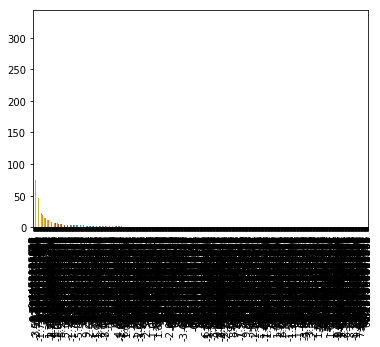

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

#a = ["male","female", "female", "empty","male","female"]
df = pd.DataFrame(data, columns= ["pearson_similarity"])

df["pearson_similarity"].value_counts().plot.bar()

plt.show()

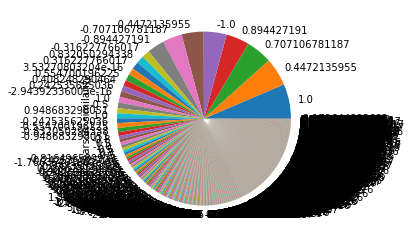

In [54]:
df["pearson_similarity"].value_counts().plot.pie()
plt.gca().set_aspect("equal")

In [55]:
df.describe()



,pearson_similarity
count,5108.000000
mean,0.097610
std,0.631340
min,-1.000000
25%,-0.447214
50%,0.170941
75%,0.693375
max,1.000000


In [56]:
data = data[data.pearson_similarity > 0]


In [57]:
data.head(10)


,user1,user2,pearson_similarity
5,VKEy2rsHMS9w0dx7zgp1sg,Y1-nbySEHec051ix7beSGw,0.426401
8,VKEy2rsHMS9w0dx7zgp1sg,11PZaYWrnnWIzrQmnmGfiQ,0.402911
9,VKEy2rsHMS9w0dx7zgp1sg,Q78B1wsKHEA7Rq7KGWFSTg,1.000000
10,VKEy2rsHMS9w0dx7zgp1sg,c7lAaz-pW58i1h1rSlyqcw,1.000000
14,UjIuMBv7yQXwKAYLFUxWqw,c7lAaz-pW58i1h1rSlyqcw,0.894427
15,Vlssq9KlNYZEr1YxL6VFFw,xBoXm64NVdhRcsa8uJpbgA,0.447214
16,Vlssq9KlNYZEr1YxL6VFFw,TIMCeRsXpIPAy4qPWjuzqA,0.894427
19,Vlssq9KlNYZEr1YxL6VFFw,aow8T0EAFdYDXmVAUO5aFg,0.109109
20,Vlssq9KlNYZEr1YxL6VFFw,prFx0Kg92PfPkoU8OY4KxA,0.707107
21,Vlssq9KlNYZEr1YxL6VFFw,ArmAaGCdCVAlkhdtaT6RzQ,0.707107


In [58]:
data.count()

user1                 2907
user2                 2907
pearson_similarity    2907
dtype: int64

In [59]:
G = nx.from_pandas_edgelist(data, "user1", "user2", ["pearson_similarity"])

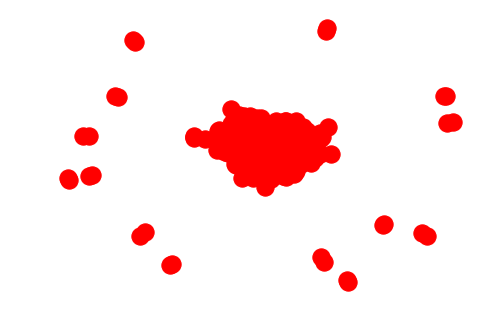

In [60]:
nx.draw(G)
plt.show()

In [61]:
comp = nx.algorithms.community.centrality.girvan_newman(G)
#to view the community

for c in next(comp):
    print(c)

set(['YlwJYpBWa-oL0byTVPNKRQ', '-fbAw0L839b8dnzcdoDHSQ', '1HejAI1OQDkw69qu7PcKfw', 'TqPiJAXEJGUjsLRIMIt-8g', 'ZF8WWJhdLw6OIzxeK8zNRw', '-55DgUo52I3zW9RxkZ-EAQ', 'QpQC0XO3pJ_VR5_PRRbMyg', 'HGNOaHmKpW1ajuAVCpA1yg', 'h6neYN7OZVt9_ok2bAx6BA', 'hDDh3dtuFZyty5KOUN0JmA', 'ltIe_eGArzU8b48rKM6yQQ', 'ACb637NG7EnswRs8U_BX_w', 'iyR5YwpMnOCmbfvk4KKczA', 'vHKhKD9PuM99k94rR88juA', 'tuYk6HQgY3eYliiOUgNFqg', 'f3-K3HwJEg2YPAh9OJSm4A', 'OwZM33ZI8LZVknaLICWIhw', 'EDcZRvERC22Cvw1yi4-VKg', 'dIA4aUlrRHthZDH5oqwuvg', 'ZYVEOShiBoWP_DjpK90ESw', 'EygKx4lr2NiK_pCUUHGXvw', 'er3oGeRMf1op9yHEGK-3yQ', 'ubZk0FCJArDL4do33Vn6Nw', '6lt_T2BvUw7ehxqYN6KALw', 'eiiR_DjRvDg2yIC2YetB7g', 'CcKiT1zOIrClWeWIldkyVA', 'LKzr5dBVVlwvsgP1pP1g-w', 'BEc3HRXw8xSEL2C6e47jRQ', 'pCWg4B0R5gauQR4SJ9VDmw', 'zdXJFWeoB0zT0jK2a4jsdA', '8Zq11pzOup3-iwOjdMMwDQ', 'LnzkE5ubITLbKYJF59VB5Q', 'MpXgjw2I0PSiLYpVh4JQhg', 'EBZ69m0uyL7jqntKu91u9Q', 'ljfwf_DkzQgTZz1cwhL4dg', 'UY13CTgUqriT-fMxT2APLw', 'v9u0NgjA4iQeKGevFnYSCA', 'dgtPNnetOQ1C-VSXAn3s0w', 'CX86Hj

In [64]:
cnt=0
for c in next(comp):
    print(c)
    print(len(c))
    print("\n")
    cnt+=1
print("number of communities"+str(cnt))    
    

set(['YlwJYpBWa-oL0byTVPNKRQ', '-fbAw0L839b8dnzcdoDHSQ', '1HejAI1OQDkw69qu7PcKfw', 'TqPiJAXEJGUjsLRIMIt-8g', 'ZF8WWJhdLw6OIzxeK8zNRw', '-55DgUo52I3zW9RxkZ-EAQ', 'QpQC0XO3pJ_VR5_PRRbMyg', 'HGNOaHmKpW1ajuAVCpA1yg', 'h6neYN7OZVt9_ok2bAx6BA', 'hDDh3dtuFZyty5KOUN0JmA', 'ltIe_eGArzU8b48rKM6yQQ', 'ACb637NG7EnswRs8U_BX_w', 'iyR5YwpMnOCmbfvk4KKczA', 'vHKhKD9PuM99k94rR88juA', 'tuYk6HQgY3eYliiOUgNFqg', 'f3-K3HwJEg2YPAh9OJSm4A', 'OwZM33ZI8LZVknaLICWIhw', 'EDcZRvERC22Cvw1yi4-VKg', 'dIA4aUlrRHthZDH5oqwuvg', 'ZYVEOShiBoWP_DjpK90ESw', 'EygKx4lr2NiK_pCUUHGXvw', 'er3oGeRMf1op9yHEGK-3yQ', 'ubZk0FCJArDL4do33Vn6Nw', '6lt_T2BvUw7ehxqYN6KALw', 'eiiR_DjRvDg2yIC2YetB7g', 'CcKiT1zOIrClWeWIldkyVA', 'LKzr5dBVVlwvsgP1pP1g-w', 'BEc3HRXw8xSEL2C6e47jRQ', 'pCWg4B0R5gauQR4SJ9VDmw', 'zdXJFWeoB0zT0jK2a4jsdA', '8Zq11pzOup3-iwOjdMMwDQ', 'LnzkE5ubITLbKYJF59VB5Q', 'MpXgjw2I0PSiLYpVh4JQhg', 'EBZ69m0uyL7jqntKu91u9Q', 'ljfwf_DkzQgTZz1cwhL4dg', 'UY13CTgUqriT-fMxT2APLw', 'v9u0NgjA4iQeKGevFnYSCA', 'dgtPNnetOQ1C-VSXAn3s0w', 'CX86Hj